*Data* Analysis for Anthony's initial data

In [ ]:
# Download dependencies
!pip3 install mysql
!pip install mysql-connector-python-rf
!pip install -U pandas-profiling
!pip3 install pandas_profiling --upgrade

     |████████████████████████████████| 92kB 3.4MB/s 
  Created wheel for mysql: filename=mysql-0.0.2-cp37-none-any.whl size=1248 sha256=fd3b3e87cd7d65609b15446747a89a1a8ff17fe373ce1468e893b5b92bd86549
  Stored in directory: /root/.cache/pip/wheels/4f/10/3f/4930effd0320769375b5094e279cb0e4a4c10a7e5811b58f8a
  Created wheel for mysqlclient: filename=mysqlclient-2.0.3-cp37-cp37m-linux_x86_64.whl size=100102 sha256=4e10d362a3624a3cfefe83abba957667b5195dc5d520f4c322a158db03ca021f
  Stored in directory: /root/.cache/pip/wheels/75/ca/e8/ad4e7ce3df18bcd91c7d84dd28c7c08db491a2a2360efed363
Successfully built mysql mysqlclient
     |████████████████████████████████| 11.9MB 5.4MB/s 
  Created wheel for mysql-connector-python-rf: filename=mysql_connector_python_rf-2.2.2-cp37-cp37m-linux_x86_64.whl size=249456 sha256=a283ffc1341d1a2e715990ba230eb10487f7e218a09054150f45f000ff66de43
  Stored in directory: /root/.cache/pip/wheels/87/58/fb/d95c84fad7e1bebfed324c13e107ebb08e1997c9226532859a
Successfully

In [ ]:
# Relevant Standard Processing Libraries
import mysql.connector
import math
import re
import numpy as np 
import pandas as pd 
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
from IPython.display import Image
import glob
import seaborn as sns
import re
import os
import zipfile
import pandas_profiling



# Load the Data
- Grab the data from the mysql database

In [ ]:
# Load the Relevant Files
mydb=mysql.connector.connect(host="reflex-db.cpnc3fqshxq3.us-east-1.rds.amazonaws.com",user="admin",passwd="dxTbfZLXgLdrY4zn2iHp", database="Reflex") 
mycursor = mydb.cursor()
mycursor.execute("SELECT * FROM data_point")
myresult = mycursor.fetchall()
data_points_df = pd.DataFrame(myresult,columns=['iteration_num', 'unix_time', 'user_id', 'game_type', 'data_type', 'set_id', 'reflex_time'])



In [ ]:
data_points_df.head(5)

,iteration_num,unix_time,user_id,game_type,data_type,set_id,reflex_time
0,26,1616015726,6,moba,reaction,12,711.803
1,27,1616015727,6,moba,reaction,13,759.908
2,28,1616015728,6,moba,reaction,14,423.844
3,29,1616015729,6,moba,reaction,15,796.102
4,30,1616015730,6,moba,reaction,16,792.314


In [ ]:
# Export to to CSV 
data_points_df.to_csv(r'reflex_data_points.csv', index = False, header=True)
from google.colab import files
files.download("reflex_data_points.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Clean The Data

In [ ]:
# clean
# Todo - remove outliers
data_points_df = data_points_df[data_points_df.reflex_time < 1000]
data_points_df = data_points_df.loc[(data_points_df["user_id"] == 2) |  (data_points_df["user_id"] == 10) | (data_points_df["user_id"]  == 12)]
# data_points_df['user_id'] = data_points_df['user_id'].astype(str)

# Visualize the Data 

In [ ]:
# Elementary Analysis based on the limited data
data_points_df.profile_report()



Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
anthstew_data_points_df = data_points_df[data_points_df.user_id == 2]
manny_data_points_df = data_points_df[data_points_df.user_id == 10]
mihir_data_points_df = data_points_df[data_points_df.user_id == 12]

# anthstew_data_points_df[['reflex_time']].profile_report()

anthstew_data_points_df.dtypes

iteration_num      int64
unix_time          int64
user_id            int64
game_type         object
data_type         object
set_id             int64
reflex_time      float64
dtype: object

No handles with labels found to put in legend.


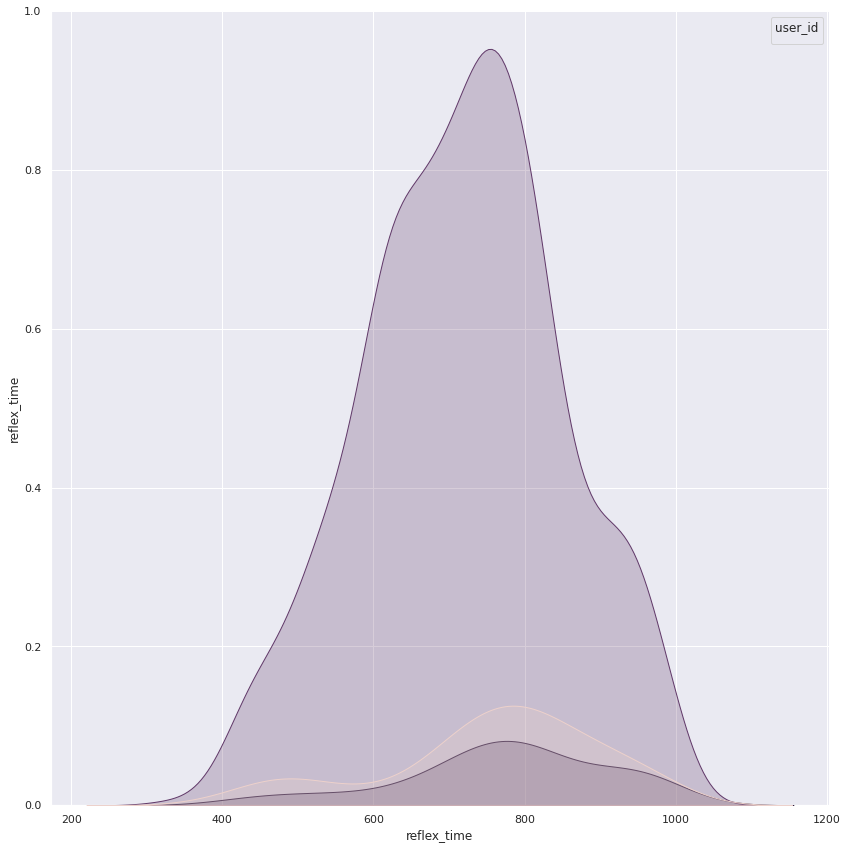

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(10,20)})
data_points_df_reflex_user_id = data_points_df[['reflex_time', 'user_id']]
gp = sns.pairplot(data_points_df_reflex_user_id, hue='user_id', height=12);
gp._legend.remove()
plt.legend(title='user_id')
plt.show()

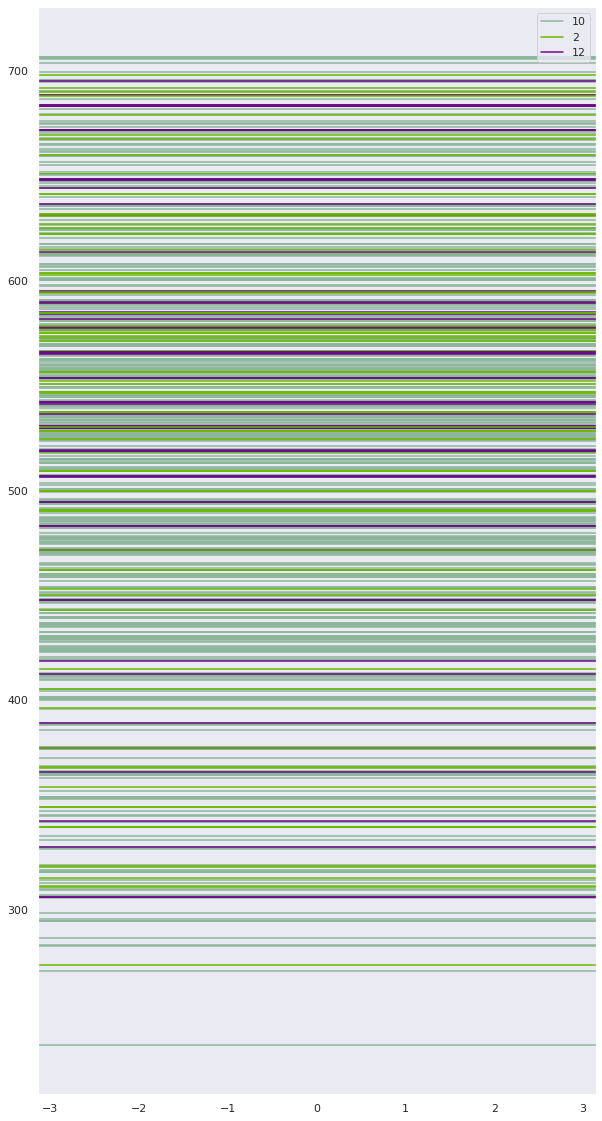

In [ ]:
from pandas.plotting import andrews_curves
plt.figure()
pd.plotting.andrews_curves(data_points_df_reflex_user_id, 'user_id')


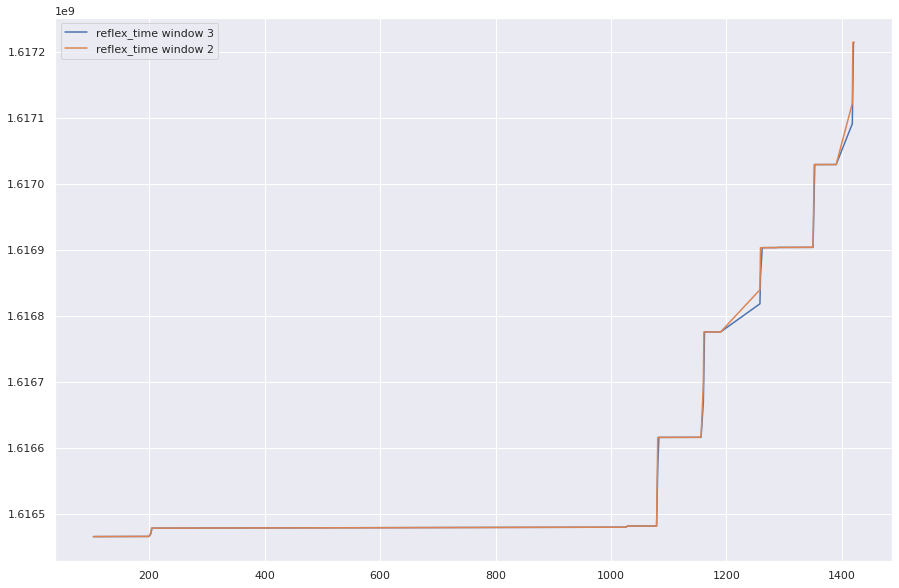

In [ ]:
data_points_df['reflex_time_3'] = data_points_df.iloc[:,1].rolling(window=3).mean()
data_points_df['reflex_time_2'] = data_points_df.iloc[:,1].rolling(window=2).mean()
plt.figure(figsize=[15,10])
plt.grid(True)
# plt.plot(data_points_df['reflex_time'],label='reflex_time')
plt.plot(data_points_df['reflex_time_3'],label='reflex_time window 3')
plt.plot(data_points_df['reflex_time_2'],label='reflex_time window 2')
plt.legend(loc=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

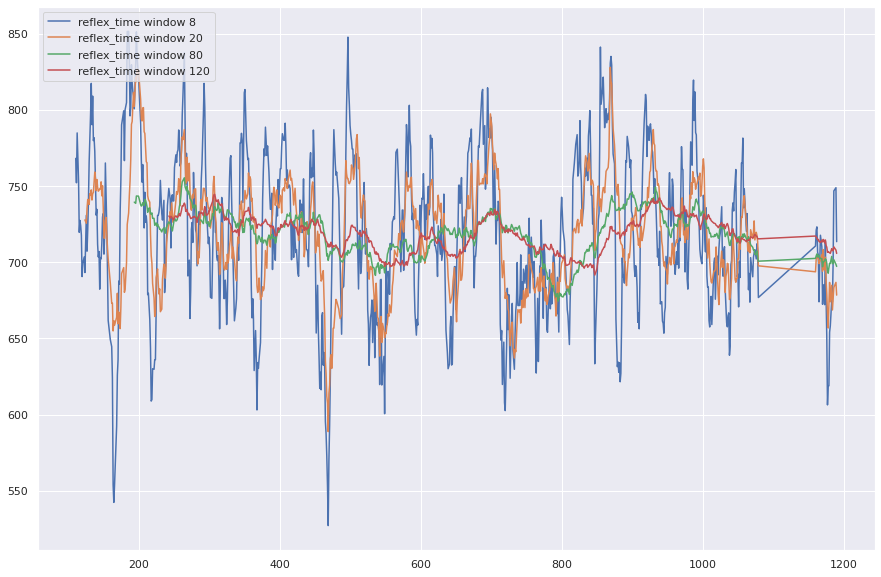

In [ ]:
# manny_data_points_df['reflex_time_2'] = manny_data_points_df.iloc[:,6].rolling(window=2).mean()
# manny_data_points_df['reflex_time_4'] = manny_data_points_df.iloc[:,6].rolling(window=4).mean()
manny_data_points_df['reflex_time_8'] = manny_data_points_df.iloc[:,6].rolling(window=8).mean()
manny_data_points_df['reflex_time_20'] = manny_data_points_df.iloc[:,6].rolling(window=20).mean()
manny_data_points_df['reflex_time_80'] = manny_data_points_df.iloc[:,6].rolling(window=80).mean()
manny_data_points_df['reflex_time_120'] = manny_data_points_df.iloc[:,6].rolling(window=120).mean()


plt.figure(figsize=[15,10])
plt.grid(True)
# plt.plot(manny_data_points_df['reflex_time'],label='reflex_time')
# plt.plot(manny_data_points_df['reflex_time_4'],label='reflex_time window 4')
plt.plot(manny_data_points_df['reflex_time_8'],label='reflex_time window 8')
plt.plot(manny_data_points_df['reflex_time_20'],label='reflex_time window 20')
plt.plot(manny_data_points_df['reflex_time_80'],label='reflex_time window 80')
plt.plot(manny_data_points_df['reflex_time_120'],label='reflex_time window 120')
# plt.plot(manny_data_points_df['regressed_reflex'],label='sd')

plt.legend(loc=2)

In [ ]:
d = np.polyfit(manny_data_points_df['reflex_time'],manny_data_points_df['reflex_time'].index, 1)
f = np.poly1d(d)
manny_data_points_df.insert(1,'regressed_reflex',f(manny_data_points_df['reflex_time']))

ValueError: ignored

In [ ]:
print(f)

 
-0.09097 x + 678


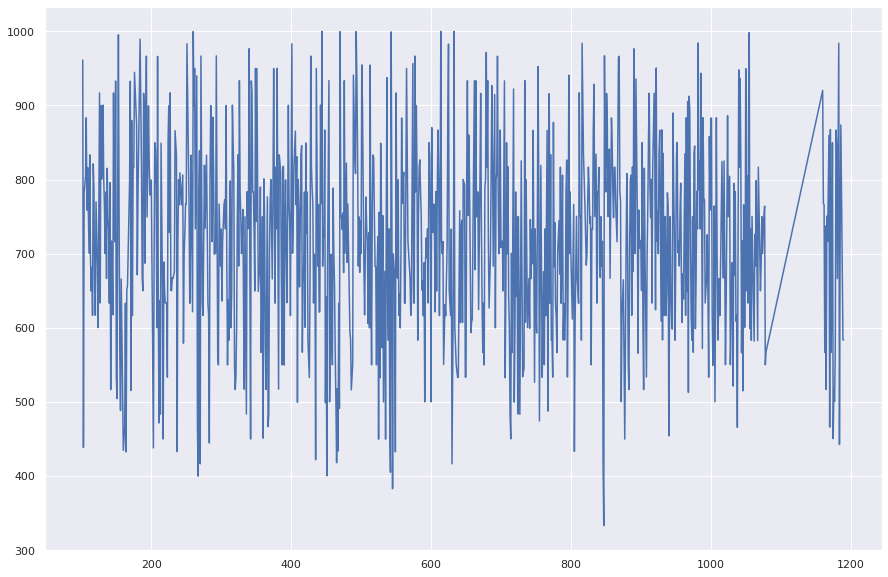

In [ ]:

plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(manny_data_points_df['reflex_time'],label='reflex_time')

In [ ]:
manny_data_points_df

,iteration_num,regressed_reflex,unix_time,user_id,game_type,data_type,set_id,reflex_time,reflex_time_8,reflex_time_20,reflex_time_80,reflex_time_120
102,151,590.501652,1616465324,10,moba,reaction,133,961.312,NaN,NaN,NaN,NaN
103,153,638.070671,1616465327,10,moba,reaction,135,438.391,NaN,NaN,NaN,NaN
104,154,606.767802,1616465328,10,moba,reaction,136,782.500,NaN,NaN,NaN,NaN
106,156,604.775151,1616465331,10,moba,reaction,138,804.405,NaN,NaN,NaN,NaN
107,157,597.599695,1616465333,10,moba,reaction,139,883.284,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1184,1311,637.695064,1616775429,10,moba,reaction,1293,442.520,674.082125,668.70320,699.083813,707.748008
1185,1312,611.943056,1616775430,10,moba,reaction,1294,725.609,700.183250,676.65360,699.084788,707.546625
1186,1313,598.469166,1616775431,10,moba,reaction,1295,873.726,746.830125,683.47450,701.666250,710.102983
1189,1316,624.872231,1616775521,10,moba,reaction,1298,583.480,748.932625,686.80905,698.645825,707.999325
